In [1]:
import os.path as op
from glob import glob
import gzip
import pickle

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

from utils import plot_gradient, plot_subcortical_gradient, plot_meta_maps

In [2]:
result_dir = op.abspath("../results")
data_dir = op.abspath("../data")
output_dir = op.join(result_dir, "decoding")

In [3]:
# Indices to show corresponding to auditory, motor, and visual maps
term_ns_idxs = np.array([272, 1863, 3144])
term_nq_idxs = np.array([468, 3407, 5977])
lda_ns_idxs = np.array([116, 92, 62])
lda_nq_idxs = np.array([5, 190, 182])
gclda_ns_idxs = np.array([95, 13, 54])
gclda_nq_idxs = np.array([76, 181, 134])

In [4]:
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps
cmap = nilearn_cmaps['cold_hot']

# Neurosynth

## Term-based Meta-Analysis

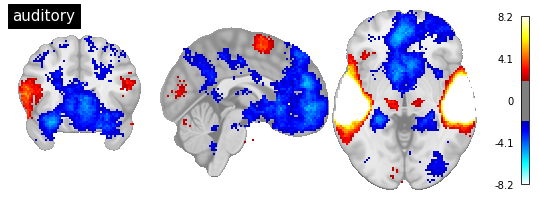

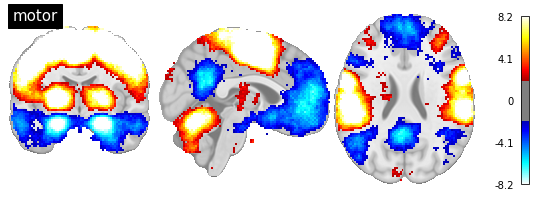

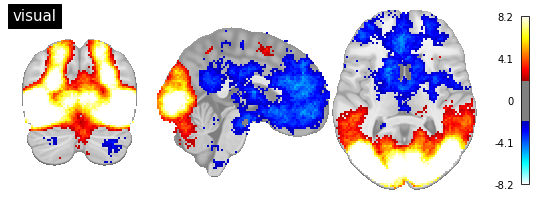

In [5]:
term_ns_decoder_fn = op.join(output_dir, f"term_neurosynth_decoder.pkl.gz")
plot_meta_maps(term_ns_decoder_fn, term_ns_idxs, out_dir="./Fig/meta-analysis/term_ns")

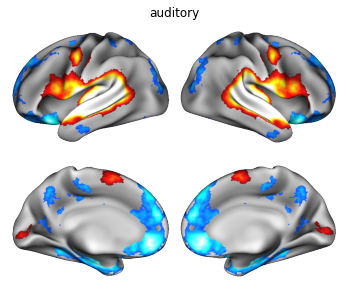

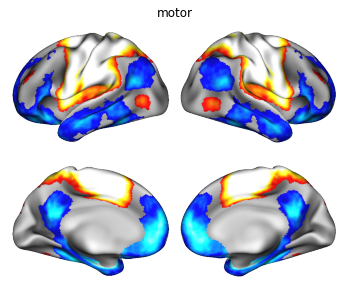

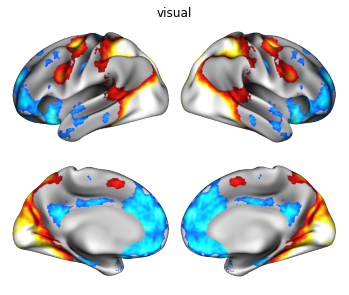

In [6]:
term_ns_grad_path = op.join(output_dir, "term_neurosynth_fslr")
term_ns_grad_lh_fnames = sorted(glob(op.join(term_ns_grad_path, "*hemi-L_feature.func.gii")))
term_ns_grad_rh_fnames = sorted(glob(op.join(term_ns_grad_path, "*hemi-R_feature.func.gii")))
term_ns_grad_fnames = zip(np.array(term_ns_grad_lh_fnames)[term_ns_idxs], np.array(term_ns_grad_rh_fnames)[term_ns_idxs])
features_to_plot = ["auditory", "motor", "visual"]

plot_gradient("../data", term_ns_grad_fnames, features_to_plot, threshold_=2, title=True, cmap=cmap, out_dir="./Fig/meta-analysis/term_ns", prefix="fsLR")

## LDA-based Meta-Analysis

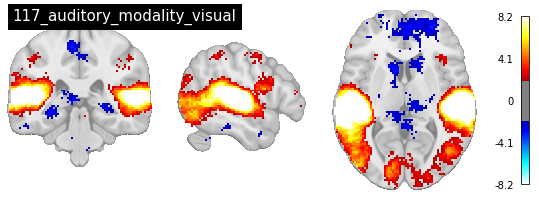

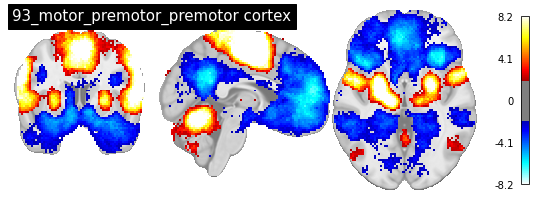

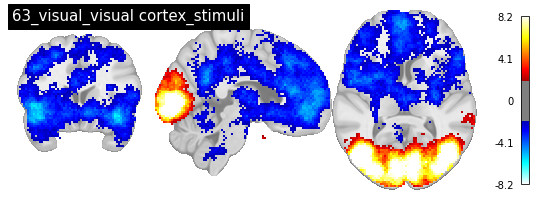

In [12]:
lda_ns_decoder_fn = op.join(output_dir, f"lda_neurosynth_decoder.pkl.gz")
plot_meta_maps(lda_ns_decoder_fn, lda_ns_idxs, out_dir="./Fig/meta-analysis/lda_ns")

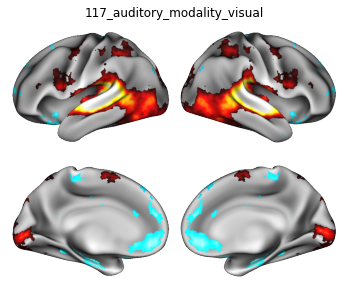

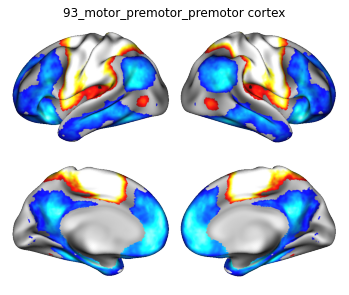

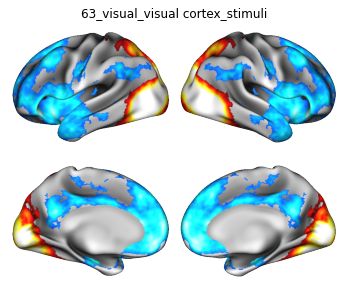

In [7]:
lda_ns_grad_path = op.join(output_dir, "lda_neurosynth_fslr")
lda_ns_grad_lh_fnames = sorted(glob(op.join(lda_ns_grad_path, "*hemi-L_feature.func.gii")))
lda_ns_grad_rh_fnames = sorted(glob(op.join(lda_ns_grad_path, "*hemi-R_feature.func.gii")))
lda_ns_grad_fnames = zip(np.array(lda_ns_grad_lh_fnames)[lda_ns_idxs], np.array(lda_ns_grad_rh_fnames)[lda_ns_idxs])
lda_features_to_plot = ["117_auditory_modality_visual", "93_motor_premotor_premotor cortex", "63_visual_visual cortex_stimuli"]

plot_gradient("../data", lda_ns_grad_fnames, lda_features_to_plot, threshold_=2, title=True, cmap=cmap, out_dir="./Fig/meta-analysis/lda_ns", prefix="fsLR")

## GCLDA-based Meta-Analysis

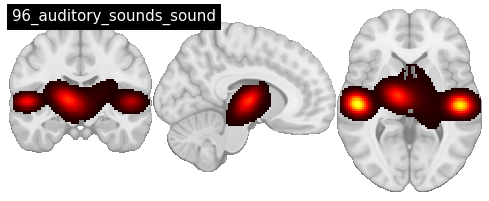

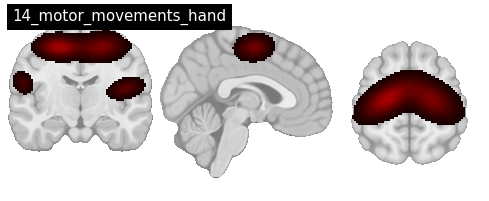

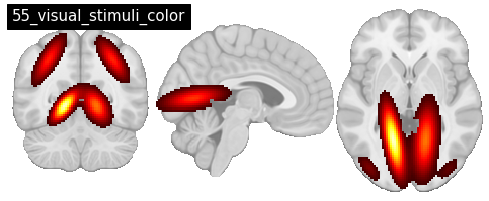

In [5]:
gclda_ns_decoder_fn = op.join(output_dir, f"gclda_neurosynth_model.pkl.gz")
plot_meta_maps(gclda_ns_decoder_fn, gclda_ns_idxs, threshold=0.00001, model="gclda", colorbar=False, out_dir="./Fig/meta-analysis/gclda_ns")

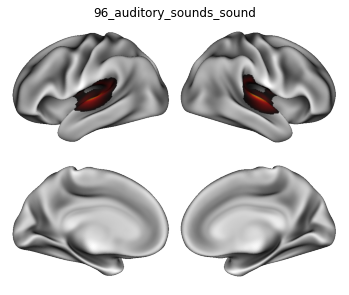

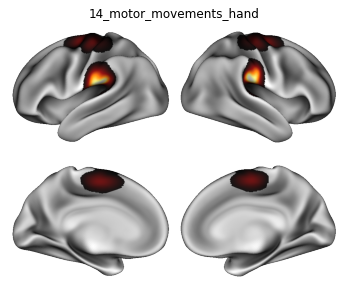

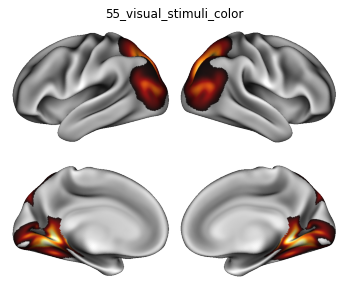

In [21]:
gclda_ns_grad_path = op.join(output_dir, "gclda_neurosynth_fslr")
gclda_ns_grad_lh_fnames = sorted(glob(op.join(gclda_ns_grad_path, "*hemi-L_feature.func.gii")))
gclda_ns_grad_rh_fnames = sorted(glob(op.join(gclda_ns_grad_path, "*hemi-R_feature.func.gii")))
gclda_ns_grad_fnames = zip(np.array(gclda_ns_grad_lh_fnames)[gclda_ns_idxs], np.array(gclda_ns_grad_rh_fnames)[gclda_ns_idxs])
gclda_features_to_plot = ["96_auditory_sounds_sound", "14_motor_movements_hand", "55_visual_stimuli_color"]

plot_gradient("../data", gclda_ns_grad_fnames, gclda_features_to_plot, threshold_=0.00001, cmap="afmhot", title=True, out_dir="./Fig/meta-analysis/gclda_ns", prefix="fsLR")

# NeuroQuery

## Term-based Meta-Analysis

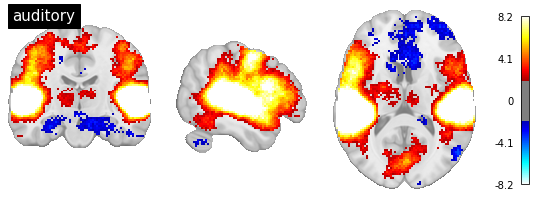

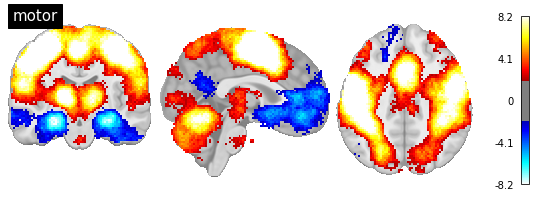

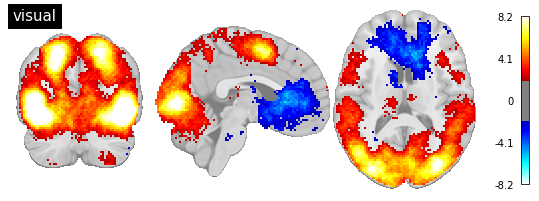

In [11]:
term_nq_decoder_fn = op.join(output_dir, f"term_neuroquery_decoder.pkl.gz")
plot_meta_maps(term_nq_decoder_fn, term_nq_idxs, out_dir="./Fig/meta-analysis/term_nq")

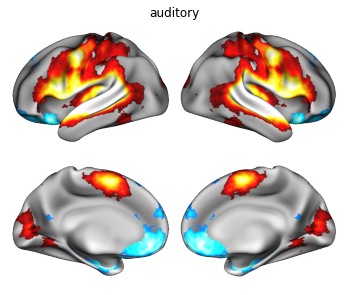

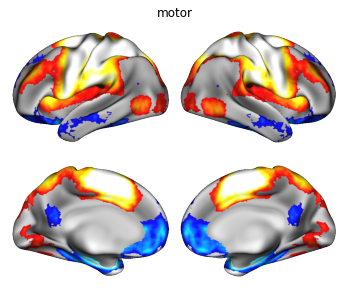

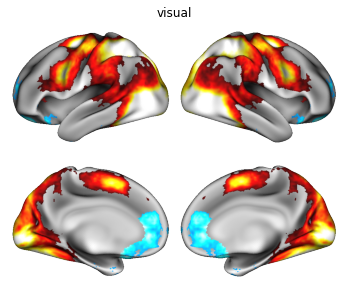

In [12]:
term_nq_grad_path = op.join(output_dir, "term_neuroquery_fslr")
term_nq_grad_lh_fnames = sorted(glob(op.join(term_nq_grad_path, "*hemi-L_feature.func.gii")))
term_nq_grad_rh_fnames = sorted(glob(op.join(term_nq_grad_path, "*hemi-R_feature.func.gii")))
term_nq_grad_fnames = zip(np.array(term_nq_grad_lh_fnames)[term_nq_idxs], np.array(term_nq_grad_rh_fnames)[term_nq_idxs])
features_to_plot = ["auditory", "motor", "visual"]

plot_gradient("../data", term_nq_grad_fnames, features_to_plot, threshold_=2, title=True, cmap=cmap, out_dir="./Fig/meta-analysis/term_nq", prefix="fsLR")

## LDA-based Meta-Analysis

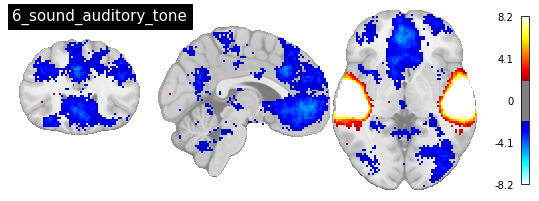

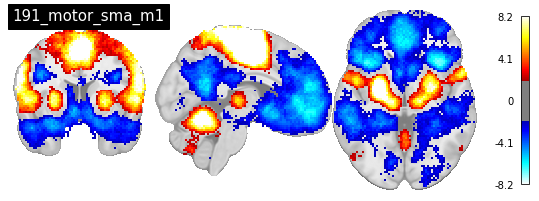

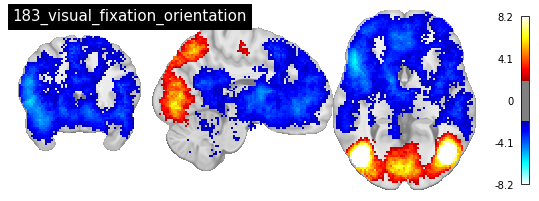

In [13]:
lda_nq_decoder_fn = op.join(output_dir, f"lda_neuroquery_decoder.pkl.gz")
plot_meta_maps(lda_nq_decoder_fn, lda_nq_idxs, out_dir="./Fig/meta-analysis/lda_nq")

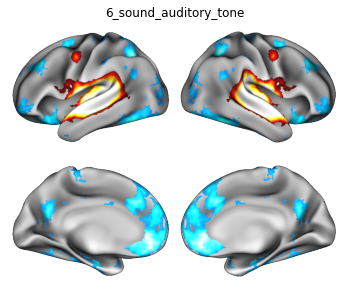

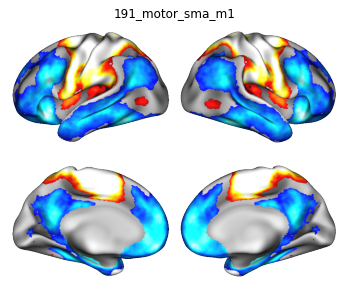

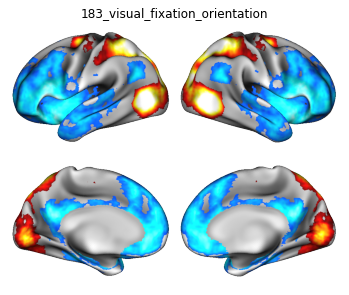

In [14]:
lda_nq_grad_path = op.join(output_dir, "lda_neuroquery_fslr")
lda_nq_grad_lh_fnames = sorted(glob(op.join(lda_nq_grad_path, "*hemi-L_feature.func.gii")))
lda_nq_grad_rh_fnames = sorted(glob(op.join(lda_nq_grad_path, "*hemi-R_feature.func.gii")))
lda_nq_grad_fnames = zip(np.array(lda_nq_grad_lh_fnames)[lda_nq_idxs], np.array(lda_nq_grad_rh_fnames)[lda_nq_idxs])
lda_features_to_plot = ["6_sound_auditory_tone", "191_motor_sma_m1", "183_visual_fixation_orientation"]

plot_gradient("../data", lda_nq_grad_fnames, lda_features_to_plot, threshold_=2, title=True, cmap=cmap, out_dir="./Fig/meta-analysis/lda_nq", prefix="fsLR")

## GCLDA-based Meta-Analysis

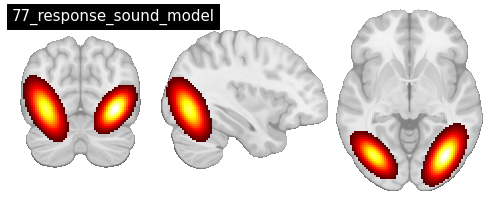

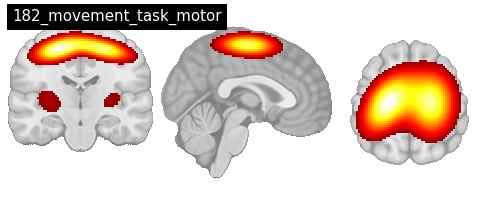

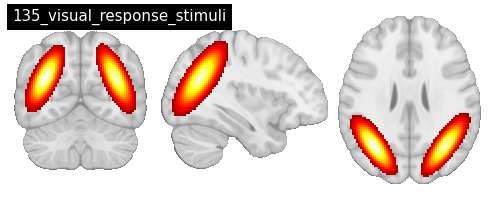

In [6]:
gclda_nq_decoder_fn = op.join(output_dir, f"gclda_neuroquery_model.pkl.gz")
plot_meta_maps(gclda_nq_decoder_fn, gclda_nq_idxs, threshold=0.00001, model="gclda", colorbar=False, out_dir="./Fig/meta-analysis/gclda_nq")

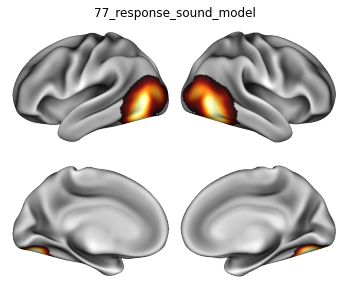

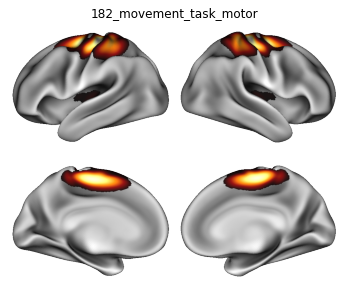

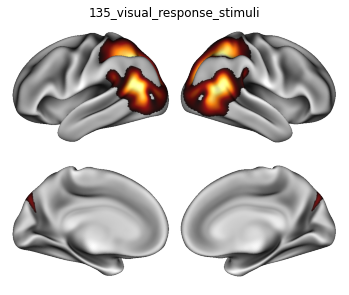

In [19]:
gclda_nq_grad_path = op.join(output_dir, "gclda_neuroquery_fslr")
gclda_nq_grad_lh_fnames = sorted(glob(op.join(gclda_nq_grad_path, "*hemi-L_feature.func.gii")))
gclda_nq_grad_rh_fnames = sorted(glob(op.join(gclda_nq_grad_path, "*hemi-R_feature.func.gii")))
gclda_nq_grad_fnames = zip(np.array(gclda_nq_grad_lh_fnames)[gclda_nq_idxs], np.array(gclda_nq_grad_rh_fnames)[gclda_nq_idxs])
gclda_features_to_plot = ["77_response_sound_model", "182_movement_task_motor", "135_visual_response_stimuli"]

plot_gradient("../data", gclda_nq_grad_fnames, gclda_features_to_plot, threshold_=0.00001, cmap="afmhot", title=True, out_dir="./Fig/meta-analysis/gclda_nq", prefix="fsLR")